In [1]:
# Importation des packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pingouin as pg
import numpy as np

C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Importation du DataFrame
df=pd.read_csv("Sample.csv", encoding='latin1')

In [3]:
# Création d'une fonction permettant de charger et de d'inspecter les données.
def load_data(x):
    try :
        df=pd.read_csv(x,encoding='latin1')
        print('\n Importation des données réussi...')
        print(f"\n La dimension du jeu de données est:{df.shape}")
        print(f"\n Ensembles des colonnes du jeu de données: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Erreur de chargement: {e}")
        return None
              
load_data('Sample.csv')


 Importation des données réussi...

 La dimension du jeu de données est:(9994, 21)

 Ensembles des colonnes du jeu de données: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
# Information sur les colonnes et recherche des valeurs manquantes et des doublons
print(f"Information sur le types et le nombre d'éléments par colonne: {df.info()}")
print(f"\n Afficharge du nombre de valeurs manquantes par colonne: {df.isnull().sum()}")
print(f"\n Afficharge du nombre de doublons: {df.duplicated(keep=False).sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Nos données ne contiennent ni de valeurs manquantes, ni de doublons. Par contre le type de certaines variables  telles que:**
    
**"Ship Date"** et **"Order Date"** , necessitent d'etre formatées.
 

In [5]:
# Formatage en date
df['Ship Date'] = pd.to_datetime(df['Ship Date']) 
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [6]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
Month                     int32
dtype: object

## Préparation des données à l'analyse

In [8]:
# Création de la colonne cout du produit "Product Cost"
df["Product Cost"]=(df["Sales"]-df["Profit"])
df["Marge %"]=df["Profit"]/df["Sales"]*100


# Analyse des ventes et performances commerciales 

## <center> Analyse de tendance du chiffre d'affaire

### Chiffre d'affaire total

In [9]:
## Calcul du chiffre d'affaire total
CA_Total=df["Sales"].sum()
print(f"Le chiffre d'affaire total des ventes est: {CA_Total}€")

Le chiffre d'affaire total des ventes est: 2297200.8603000003€


### Chiffre d'affaire dans le temps


In [10]:
CA_Temps= df.groupby(["Order Date"]).agg(Montant_vente=('Sales', 'sum')).reset_index()
CA_Temps

,Order Date,Montant_vente
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


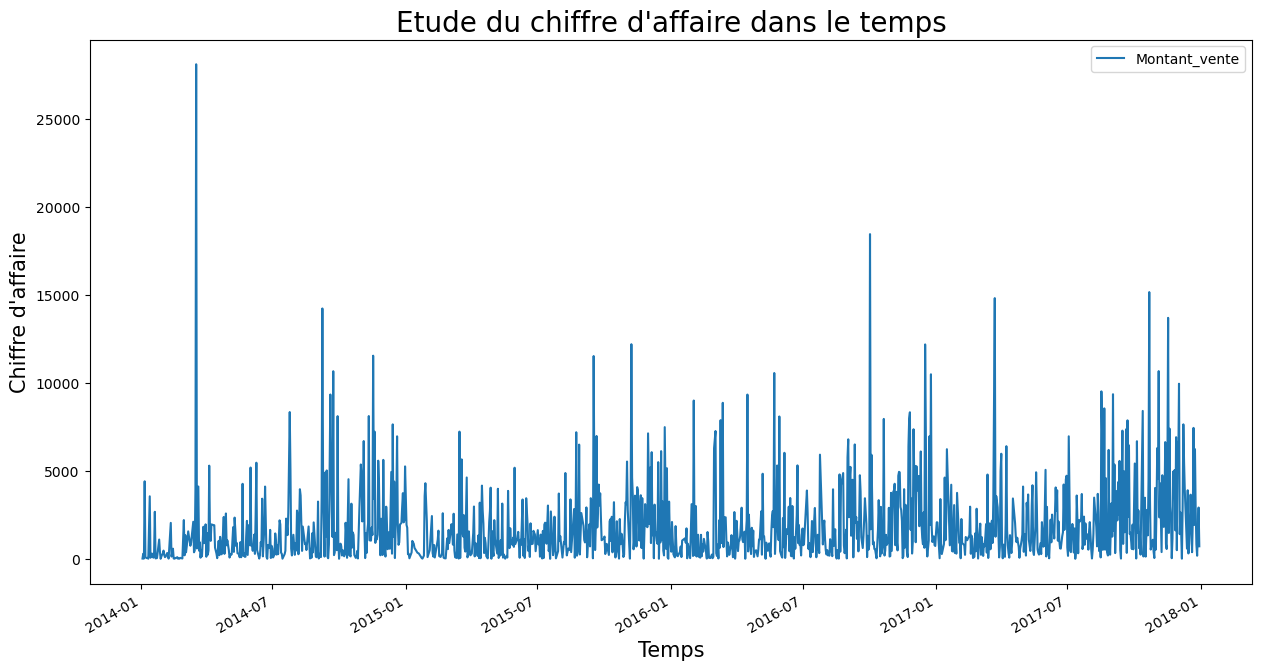

In [11]:
CA_Temps.plot.line(y='Montant_vente', x = 'Order Date',figsize=(15, 8))
plt.title("Etude du chiffre d'affaire dans le temps", size = 20)
plt.ylabel("Chiffre d'affaire", fontsize= 15)
plt.xlabel("Temps", fontsize= 15)
plt.show()

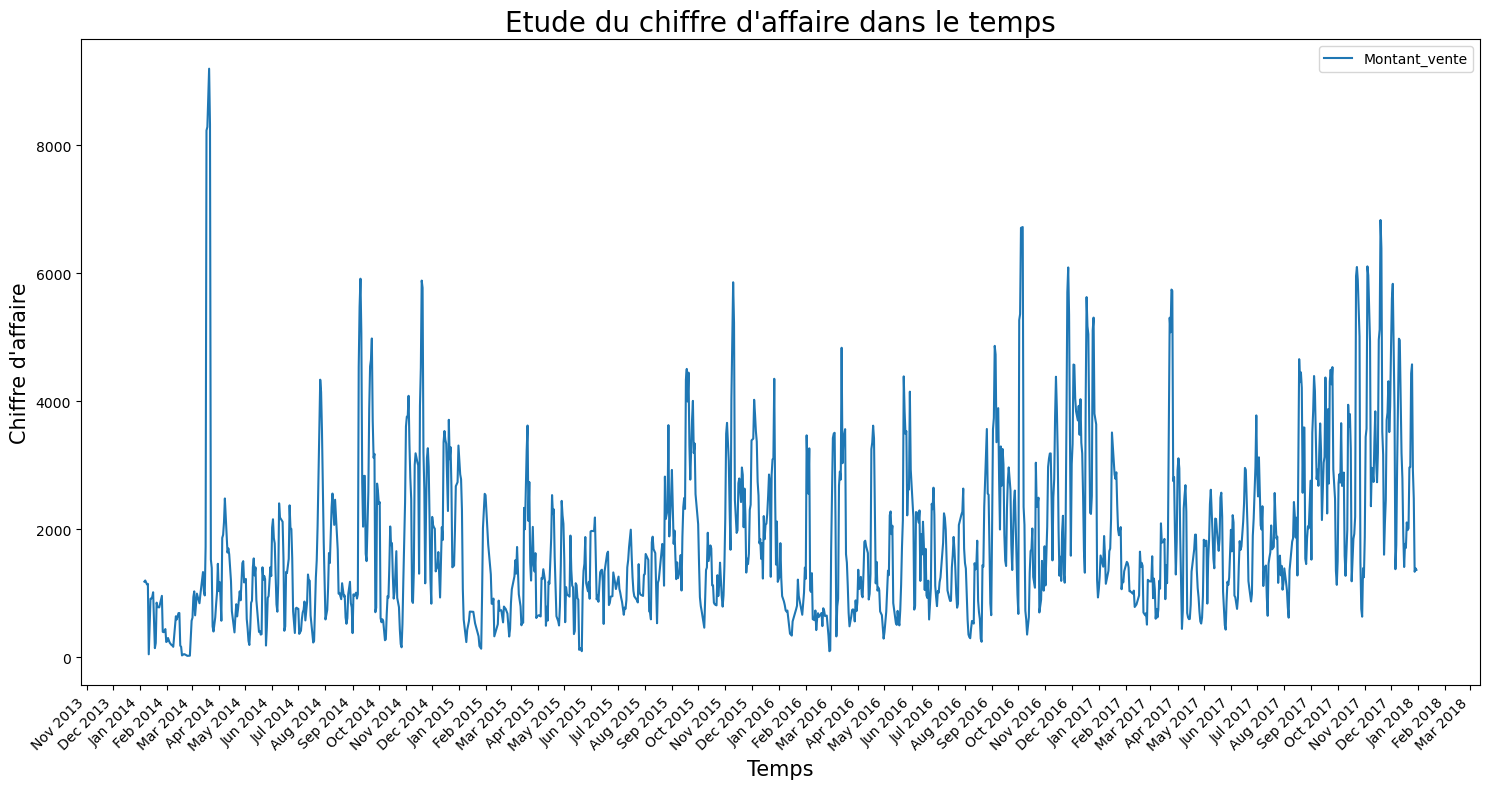

In [12]:
# Décomposition en moyenne mobile
CAmoymobile = CA_Temps
CAmoymobile['Montant_vente'] = CAmoymobile['Montant_vente'].rolling(4).mean()

# Création du graphique
ax = CAmoymobile.plot.line(y='Montant_vente', x='Order Date', figsize=(15, 8))
plt.title("Etude du chiffre d'affaire dans le temps", size=20)
plt.ylabel("Chiffre d'affaire", fontsize=15)
plt.xlabel("Temps", fontsize=15)

# Formater l'axe des abscisses pour afficher les mois
ax.xaxis.set_major_locator(mdates.MonthLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()  
plt.show()

### Comparaison des chiffres d'affaire par mois sur chaque années

In [13]:
CA_Mois_Ann=df.groupby(["Year","Month"]).agg(Total_Sales=('Sales', 'sum'))
CA_Mois_Ann= CA_Mois_Ann.unstack('Year').reset_index()
CA_Mois_Ann

Month Total_Sales                                     
Year              2014        2015        2016         2017
0        1  14236.8950  18174.0756  18542.4910   43971.3740
1        2   4519.8920  11951.4110  22978.8150   20301.1334
2        3  55691.0090  38726.2520  51715.8750   58872.3528
3        4  28295.3450  34195.2085  38750.0390   36521.5361
4        5  23648.2870  30131.6865  56987.7280   44261.1102
5        6  34595.1276  24797.2920  40344.5340   52981.7257
6        7  33946.3930  28765.3250  39261.9630   45264.4160
7        8  27909.4685  36898.3322  31115.3743   63120.8880
8        9  81777.3508  64595.9180  73410.0249   87866.6520
9       10  31453.3930  31404.9235  59687.7450   77776.9232
10      11  78628.7167  75972.5635  79411.9658  118447.8250
11      12  69545.6205  74919.5212  96999.0430   83829.3188

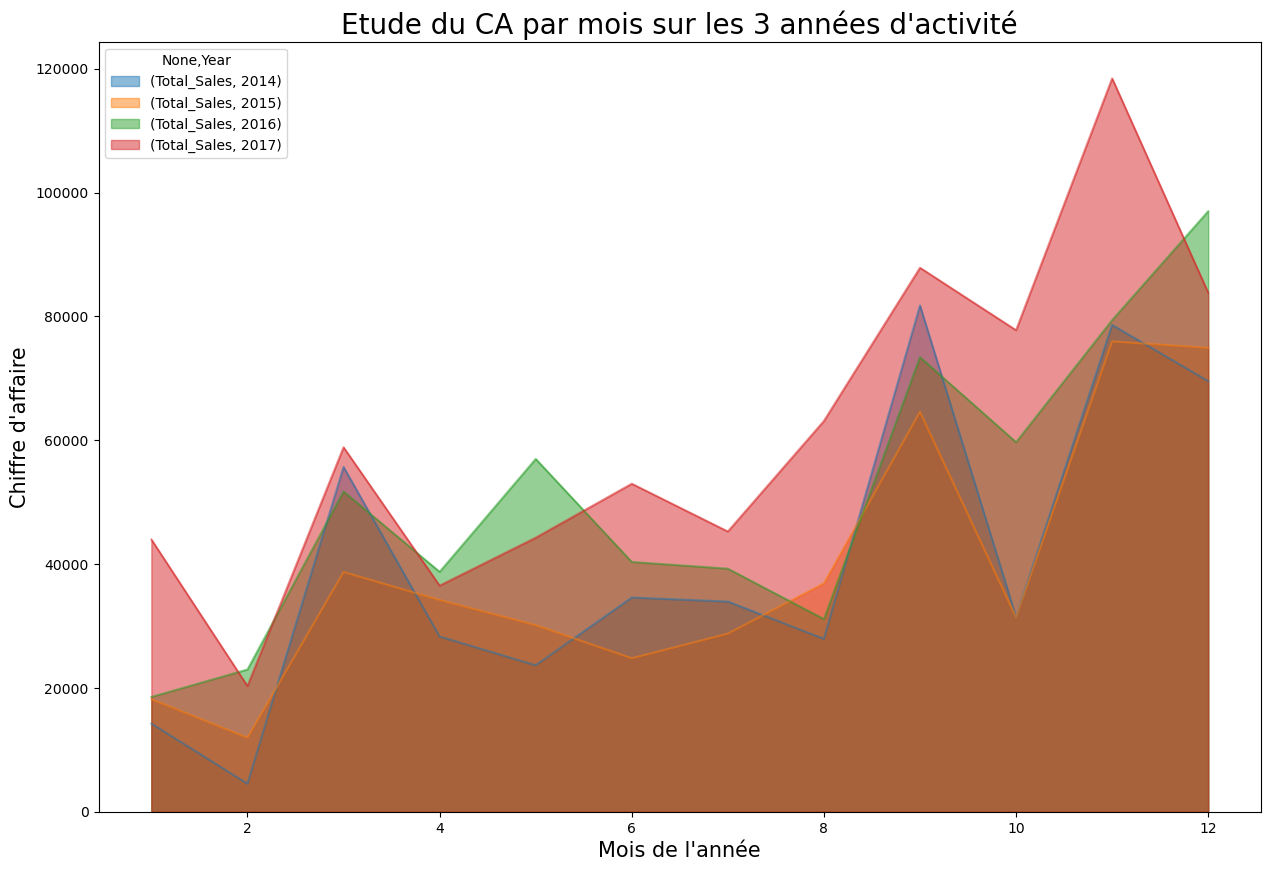

In [14]:
CA_Mois_Ann.plot.area(x = 'Month',stacked=False ,figsize=(15, 10))
plt.title("Etude du CA par mois sur les 3 années d'activité", size = 20)
plt.xlabel("Mois de l'année", size = 15)
plt.ylabel("Chiffre d'affaire", size = 15)
plt.show()

**2014**
- Données débutant à partir du mois de janvier avec un CA qui diminue légèrement jusqu'au mois de février.
- Augmentation du CA à partir du mois de février suivie d'une légère baisse à partir du mois de Mars jusqu'au mois de Juin. 
- Croissance du CA du mois de Juin au mois d'Aout suivie d'une forte baisse jusqu'au mois de Septembre.
- Croissance rapide du CA dès le début du mois de Septembre qui connait une stagnation au mois de Novembre.
- Dans l'ensemble nous observons une belle évolution du CA.

**2015**
- CA qui connait la meme évolution que celui de l'année 2014 mais avec des décroissance et des croissance qui sont plus importantes.

**2016**
- Augmentation du CA du mois de Janvier jusqu'au mois de Mars
- CA qui augmente et diminue légèrement tous les 1 mois environ.

**2017**
- Grosse baisse du CA au mois de Janvier et au mois de Novembre.
- CA qui augmente et diminue légèrement tous les 1 mois environ. 
 

### Chiffre d'affaire moyen mensuel de chaque année

In [15]:
CA_moy_mois = CA_Temps
CA_moy_mois['year'] = pd.DatetimeIndex(CA_moy_mois['Order Date']).year
CA_moy_mois['month'] = pd.DatetimeIndex(CA_moy_mois['Order Date']).month
CA_moy_mois = CA_moy_mois.groupby(["year"]).agg(CA_moy_moi=('Montant_vente', 'sum')).reset_index()
CA_moy_mois = round(CA_moy_mois.groupby(by=['year']).mean().reset_index())
CA_moy_mois

,year,CA_moy_moi
0,2014,478542.0
1,2015,473414.0
2,2016,610614.0
3,2017,732063.0


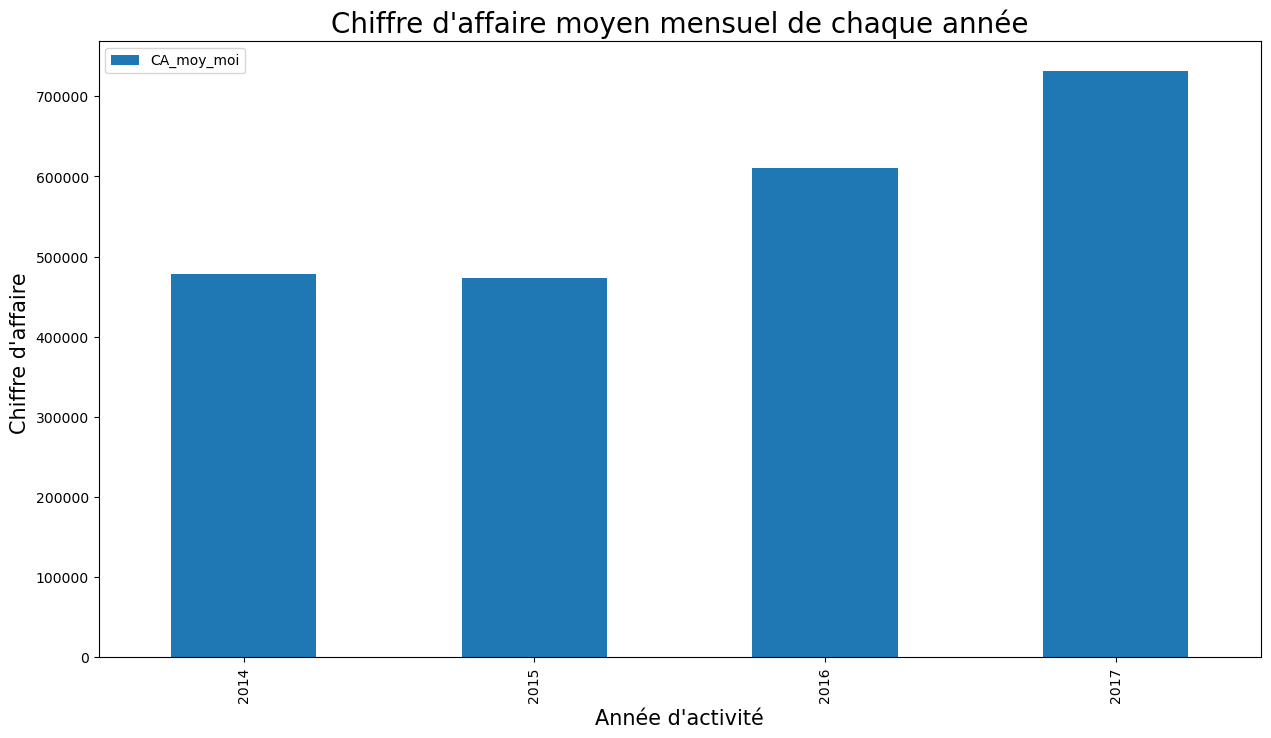

In [16]:
CA_moy_mois.plot.bar(y='CA_moy_moi', x='year', figsize=(15, 8))
plt.title("Chiffre d'affaire moyen mensuel de chaque année", size = 20)
plt.ylabel("Chiffre d'affaire ", size = 15)
plt.xlabel("Année d'activité", size = 15)
plt.show()


**Top 1**
- Année 2017 avec un chiffre d'affaire moyen par mois de plus de 61005€

**Top 2**
- Année 2016 avec un chiffre d'affaire moyen par mois de proche de 50884€

**Top 3**
- Année 2014 avec un chiffre d'affaire moyen par mois d'environ 39878€.

**Top 4**
- Année 2015 avec un chiffre d'affaire moyen légèrement inférieur à celui de 2014.

### *Chiffre d'affaire par année*

In [17]:
CA_Ann= df
CA_Ann['Year'] = pd.DatetimeIndex(CA_Ann['Order Date']).year
CA_Ann= round(df.groupby("Year").agg(CA=("Sales","sum"))).reset_index()
CA_Ann

,Year,CA
0,2014,484247.0
1,2015,470533.0
2,2016,609206.0
3,2017,733215.0


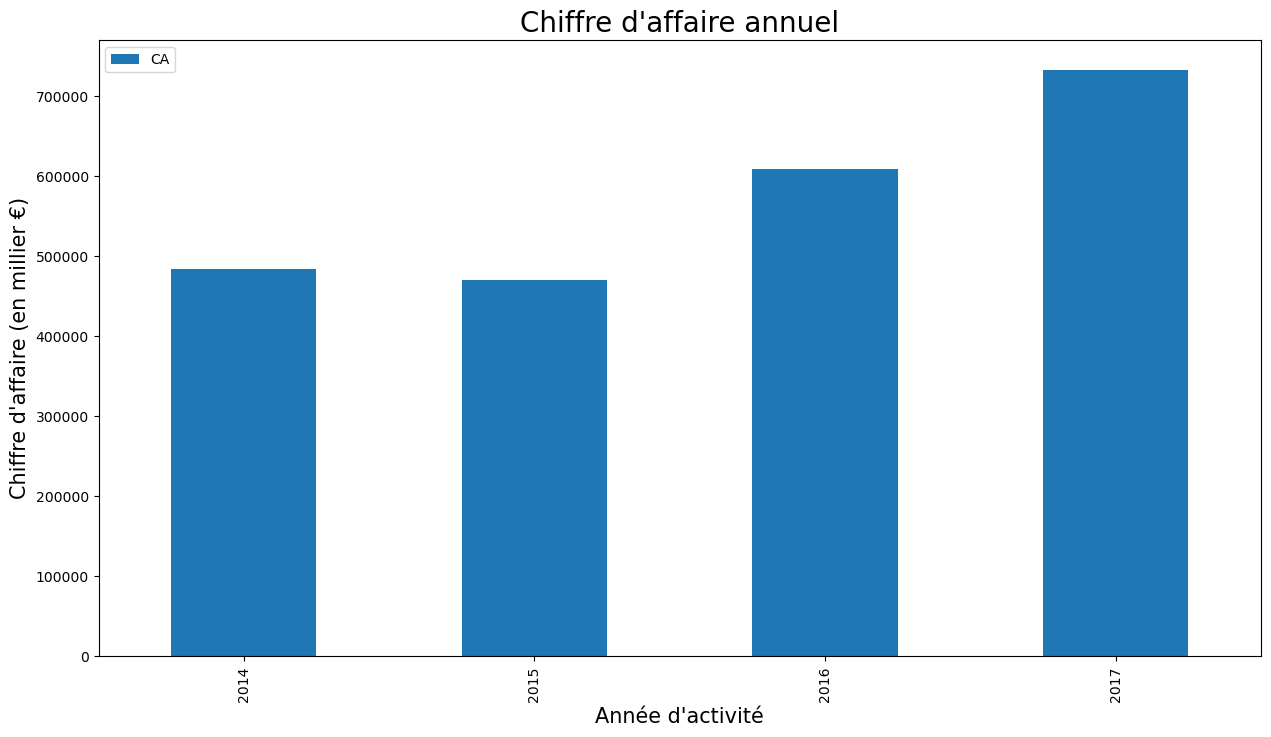

In [18]:
CA_Ann.plot.bar(y='CA', x='Year', figsize=(15, 8))
plt.title("Chiffre d'affaire annuel", size = 20)
plt.ylabel("Chiffre d'affaire (en millier €)", size = 15)
plt.xlabel("Année d'activité", size = 15)
plt.show()

**2014**
- Chiffre d'affaire atteignant presque les 485 mille euro

**2015**
- Chiffre d'affaire dépassant les 470  mille euro

**2015**
- Chiffre d'affaire dépassant les 600  mille euro

**2016**
- Chiffre d'affaire atteignant presque les 740 mille euro (seulement les 2 premiers mois)

## <center>Analyse de tendance des produits

## Analyse du chiffre d'affaire par produit.

In [20]:
# Nombre total de produit vendu
NbProdVendu = df['Product ID'].nunique()
print("Durant la période étudier", NbProdVendu,"produits différents ont été vendu !")

Durant la période étudier 1862 produits différents ont été vendu !


In [21]:
#Chiffre d'affaire par produits 
CA_prod=df.groupby("Product ID").agg(CA=("Sales","sum")).reset_index()
print("Liste des produits et chiffre d'affaire effectuer :")
CA_prod

Liste des produits et chiffre d'affaire effectuer :


,Product ID,CA
0,FUR-BO-10000112,825.174
1,FUR-BO-10000330,1064.624
2,FUR-BO-10000362,2154.348
3,FUR-BO-10000468,723.842
4,FUR-BO-10000711,851.760
...,...,...
1857,TEC-PH-10004912,516.530
1858,TEC-PH-10004922,1085.238
1859,TEC-PH-10004924,56.164
1860,TEC-PH-10004959,341.666


### **Top 10 des produits avec les plus gros CA**

In [22]:
CA_prod.sort_values(by=["CA"], ascending=False).head(10)

,Product ID,CA
1614,TEC-CO-10004722,61599.824
776,OFF-BI-10003527,27453.384
1642,TEC-MA-10002412,22638.480
80,FUR-CH-10002024,21870.576
691,OFF-BI-10001359,19823.479
657,OFF-BI-10000545,19024.500
1604,TEC-CO-10001449,18839.686
1631,TEC-MA-10001127,18374.895
845,OFF-BI-10004995,17965.068
1420,OFF-SU-10000151,17030.312


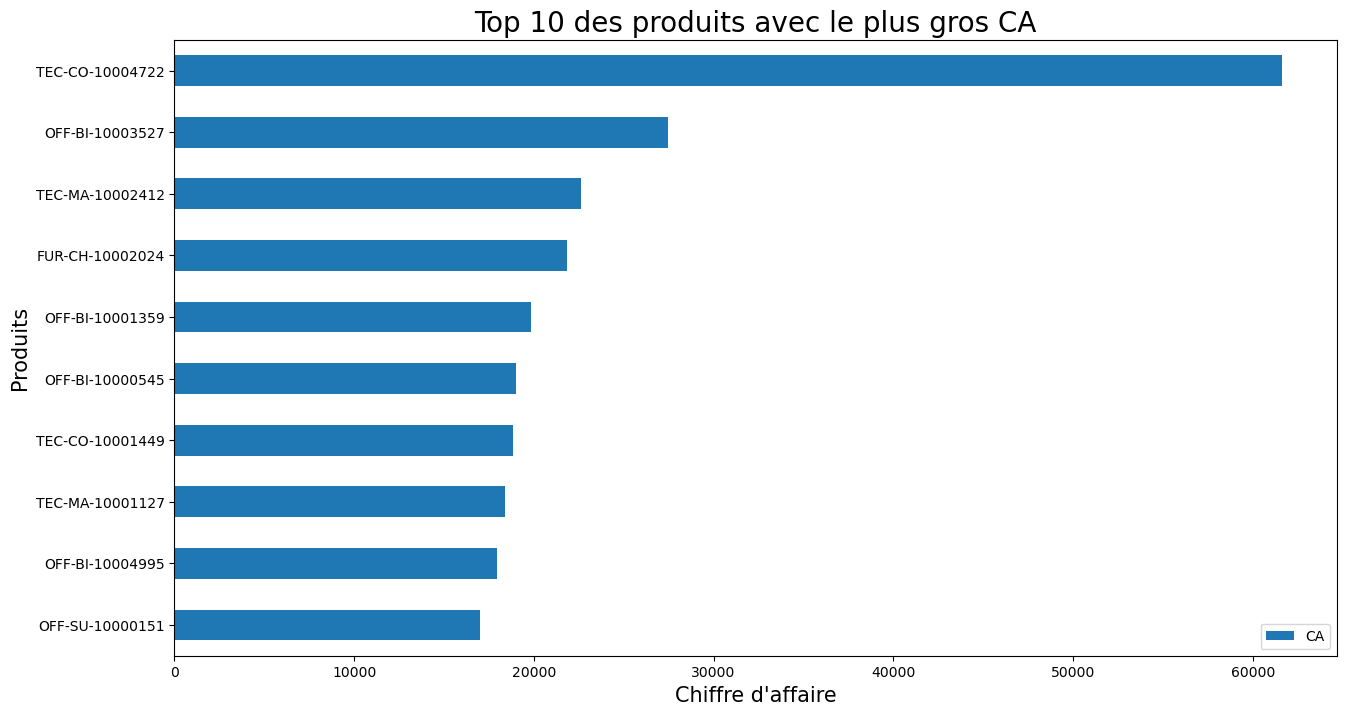

In [23]:
top_10_CA_prod = CA_prod.sort_values(by=["CA"], ascending=False).head(10)
top_10_CA_prod.sort_values(by=["CA"], ascending=True).plot.barh(x = 'Product ID',figsize=(15, 8))
plt.title("Top 10 des produits avec le plus gros CA", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Chiffre d'affaire", size = 15)
plt.show()

Le produit TEC-CO-10004722 est un **Best-Seller** qui atteind presque les **62 000€** de chiffre d'affaire !

### **Top 10 des produits les plus vendus**

In [24]:
Nbre_prod_vend=df.groupby("Product ID").agg(Quantite_totale=("Quantity","sum")).reset_index()
Top_10_vente=Nbre_prod_vend.sort_values(by=["Quantite_totale"], ascending=False).head(10)
Top_10_vente

,Product ID,Quantite_totale
1569,TEC-AC-10003832,75
1144,OFF-PA-10001970,70
694,OFF-BI-10001524,67
93,FUR-CH-10002647,64
721,OFF-BI-10002026,64
325,FUR-TA-10001095,61
1517,TEC-AC-10002049,60
835,OFF-BI-10004728,59
110,FUR-CH-10003774,59
1548,TEC-AC-10003038,57


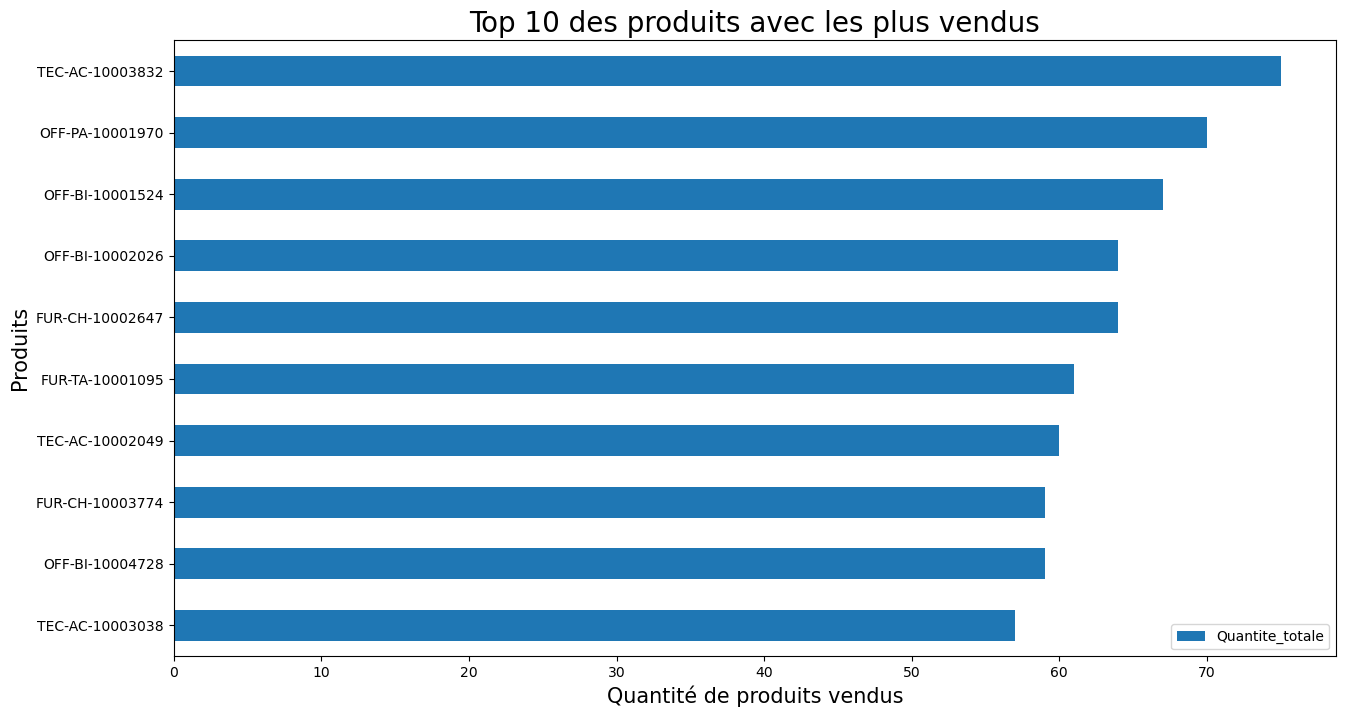

In [25]:
Top_10_vente.sort_values(by=["Quantite_totale"], ascending=True).plot.barh(x = 'Product ID',figsize=(15, 8))
plt.title("Top 10 des produits avec les plus vendus", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Quantité de produits vendus", size = 15)
plt.show()

### **Top 10 des produits avec les plus faibles CA**

In [26]:
Flaible_CA_top_10=CA_prod.sort_values(by=["CA"], ascending=True).head(10)
Flaible_CA_top_10

,Product ID,CA
418,OFF-AP-10002203,1.624
988,OFF-LA-10003388,5.760
1016,OFF-PA-10000048,6.480
862,OFF-EN-10001535,7.072
606,OFF-AR-10003986,7.700
1239,OFF-PA-10003919,7.968
581,OFF-AR-10003477,8.040
918,OFF-FA-10001754,8.096
616,OFF-AR-10004272,8.400
978,OFF-LA-10002473,9.216


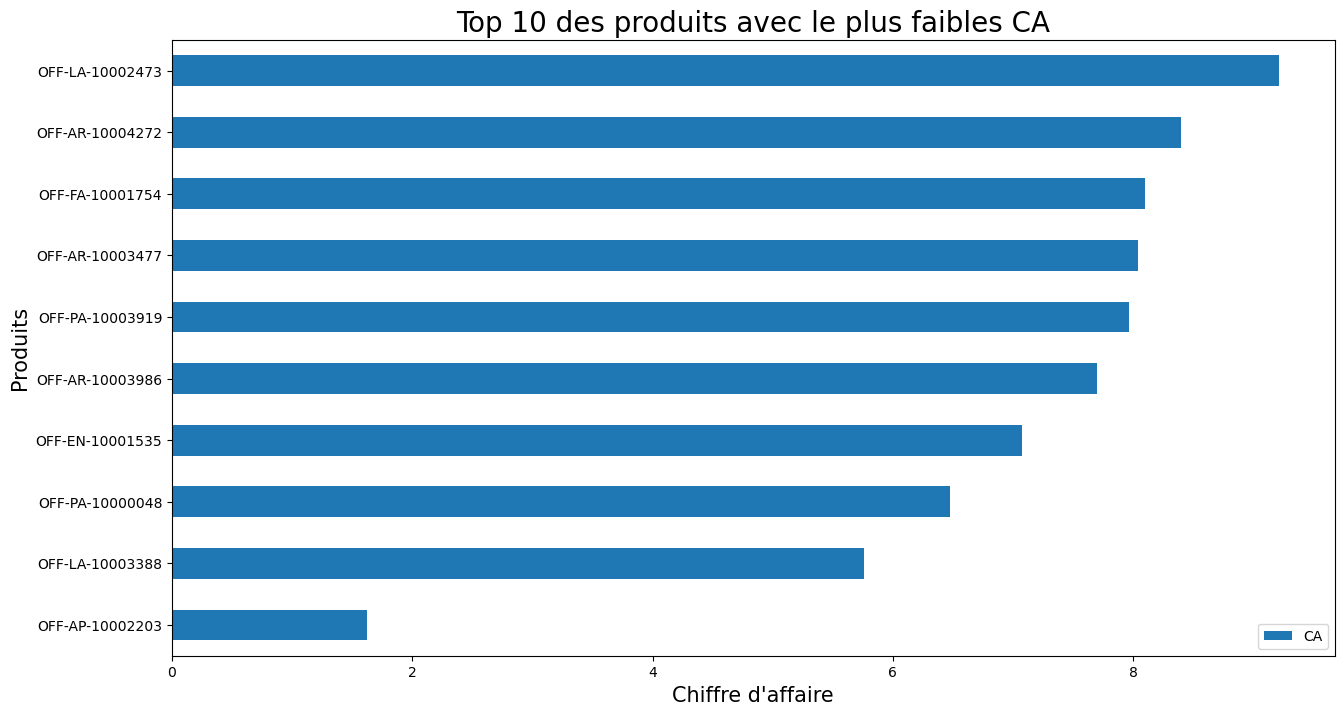

In [27]:
Flaible_CA_top_10.sort_values(by=["CA"], ascending=True).plot.barh(x = 'Product ID',figsize=(15, 8))
plt.title("Top 10 des produits avec le plus faibles CA", size = 20)
plt.ylabel("Produits", size = 15)
plt.xlabel("Chiffre d'affaire", size = 15)
plt.show()

### **Top 10 des produits les moins vendus.**

In [28]:
Flaible_vente_top_10=Nbre_prod_vend.sort_values(by=["Quantite_totale"], ascending=True).head(10)
Flaible_vente_top_10

,Product ID,Quantite_totale
558,OFF-AR-10002704,1
86,FUR-CH-10002317,1
1661,TEC-MA-10003493,1
1016,OFF-PA-10000048,1
17,FUR-BO-10002206,1
237,FUR-FU-10002874,2
1552,TEC-AC-10003133,2
1148,OFF-PA-10002001,2
1239,OFF-PA-10003919,2
1644,TEC-MA-10002694,2


## Analyse du chiffre d'affaire et de la quantité de produits vendus par catégorie de produits.

### Analyse du chiffre d'affaire par catégorie

In [29]:
#Chiffre d'affaire par catégories de produits.
CA_categ_prod=df.groupby("Category").agg(CA=("Sales","sum")).reset_index()
CA_categ_prod

,Category,CA
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


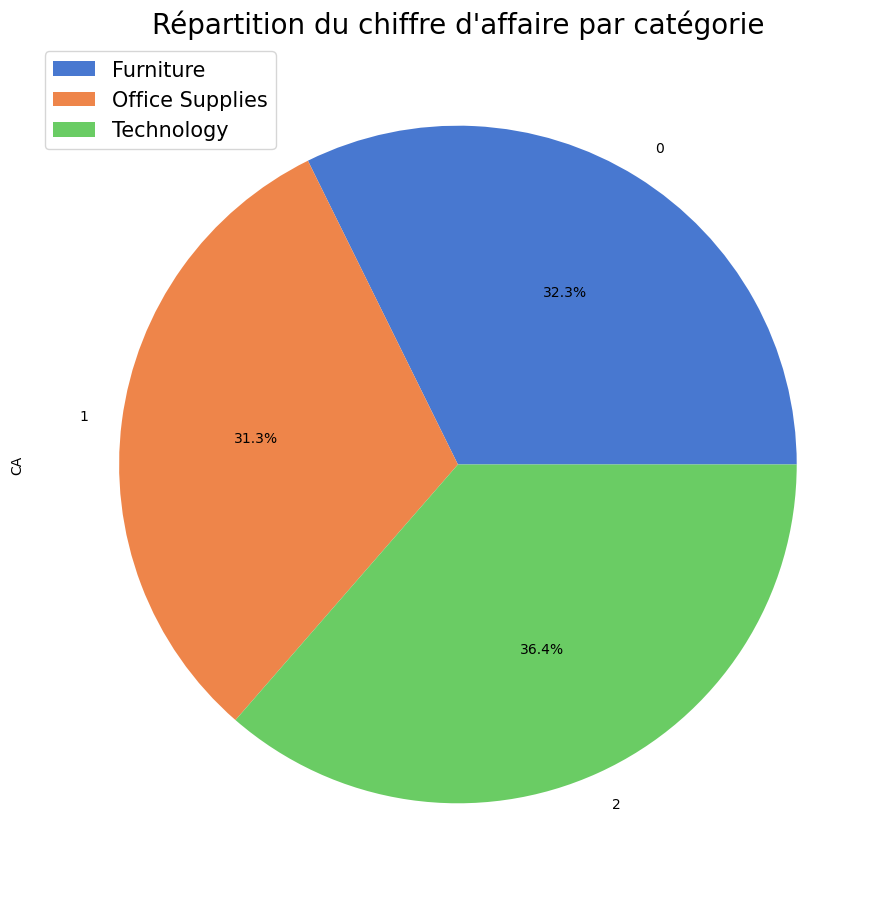

In [30]:
colors = sns.color_palette("muted")
CA_categ_prod.plot.pie(y = 'CA', colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du chiffre d'affaire par catégorie", size = 20)
plt.legend(['Furniture','Office Supplies','Technology'], fontsize = 15)
plt.show()

- La catégorie **Technology** réalise le plus gros chiffre d'affaire avec environ 36.4% du chiffre d'affaire total.
- La catégorie **Office Supplies** est très proche de la catégorie **Furniture** avec une différence de 1%.

In [31]:
MoyPrixCateg = df.groupby("Category").agg(price=("Sales","mean")).reset_index()
round(MoyPrixCateg)

,Category,price
0,Furniture,350.0
1,Office Supplies,119.0
2,Technology,453.0


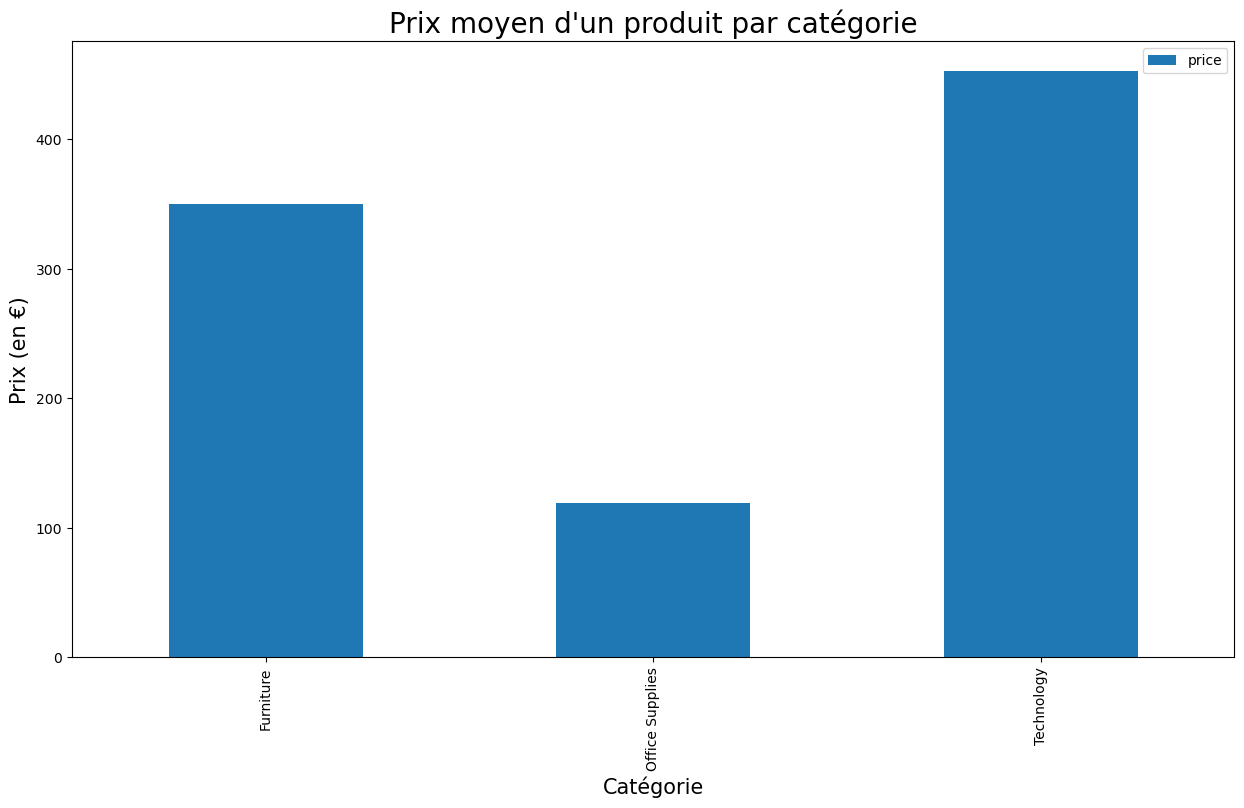

In [32]:
round(MoyPrixCateg).plot.bar(x='Category', y='price', figsize=(15, 8))
plt.title("Prix moyen d'un produit par catégorie", size = 20)
plt.ylabel("Prix (en €)", size = 15)
plt.xlabel("Catégorie", size = 15)
plt.show()

**Prix moyen des produits par catégories :**

- Categorie Furniture: 350€
- Office Supplies: 119€
- Technology: 453€


### Analyse de la quantité de produits vendus par catégorie

In [33]:
# Nombre de produits par catégories
Nbre_prod_categ=df.groupby("Category").agg(Quantity=("Quantity","sum")).reset_index()
Nbre_prod_categ

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


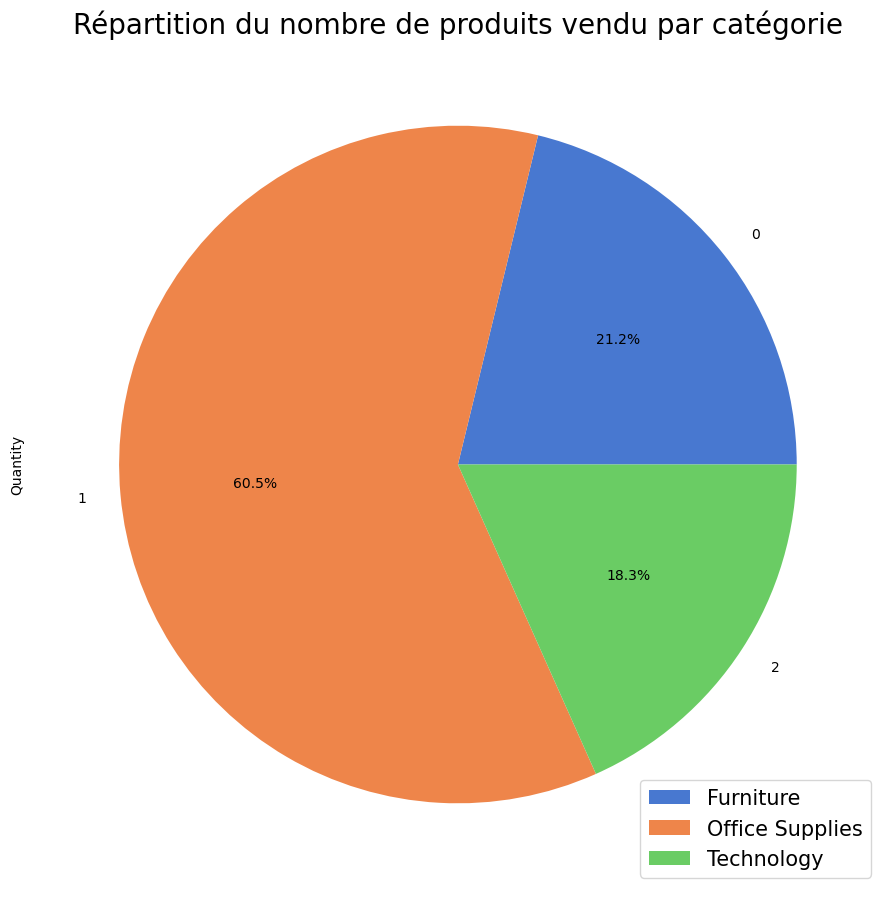

In [34]:
colors = sns.color_palette("muted")
Nbre_prod_categ.plot.pie(y="Quantity", colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Furniture','Office Supplies','Technology'], fontsize = 15)
plt.show()

- La majorité des produits vendu font parti de la catégorie **Office Supplies**, avec plus de 60% des ventes !

- La catégorie **Furniture** est proche des 21%.

- Un peu plus de 18% pour la catégorie **Technology**.

**En comparant la répartition des vente par catégorie ainsi que le prix moyen par catégorie, on peu constater que moins le prix moyen est élever plus les produits sont vendu !**

### Nombre total de client.

In [35]:
Nbre_client=df["Customer ID"].nunique()
print(f"le nombre total de clients est: {Nbre_client} clients!")

le nombre total de clients est: 793 clients!


### Analyse du chffre d'affaire par client.

In [36]:
CA_client=df.groupby("Customer ID").agg(CA=("Sales","sum")).reset_index()
CA_client.sort_values(by=["CA"], ascending=False).head(20)

,Customer ID,CA
700,SM-20320,25043.050
741,TC-20980,19052.218
621,RB-19360,15117.339
730,TA-21385,14595.620
6,AB-10105,14473.571
434,KL-16645,14175.229
669,SC-20095,14142.334
327,HL-15040,12873.298
683,SE-20110,12209.438
131,CC-12370,12129.072


###  Analyse du chiffre d'affaire par canal de distribution.

In [47]:
CA_client=df.groupby("Ship Mode").agg(CA=("Sales","sum")).reset_index()
CA_client.sort_values(by=["CA"], ascending=False).head(20)

,Ship Mode,CA
3,Standard Class,1.358216e+06
2,Second Class,4.591936e+05
0,First Class,3.514284e+05
1,Same Day,1.283631e+05


In [46]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Product Cost,Marge %
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,220.0464,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,512.3580,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,7.7486,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,1340.6085,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,19.8516,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1,21.1452,16.25
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2,76.3268,17.00
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2,239.1828,7.50
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2,16.2800,45.00


# Analyse de tendance  géographique

## <center> Analyse des quantités de vente par région.

### Analyse des quantités vendus par région

In [37]:
# Chiffre d'affaires par région
Quan_prod_region = df.groupby('Region')['Product ID'].count().reset_index()
print(Quan_prod_region)

    Region  Product ID
0  Central        2323
1     East        2848
2    South        1620
3     West        3203


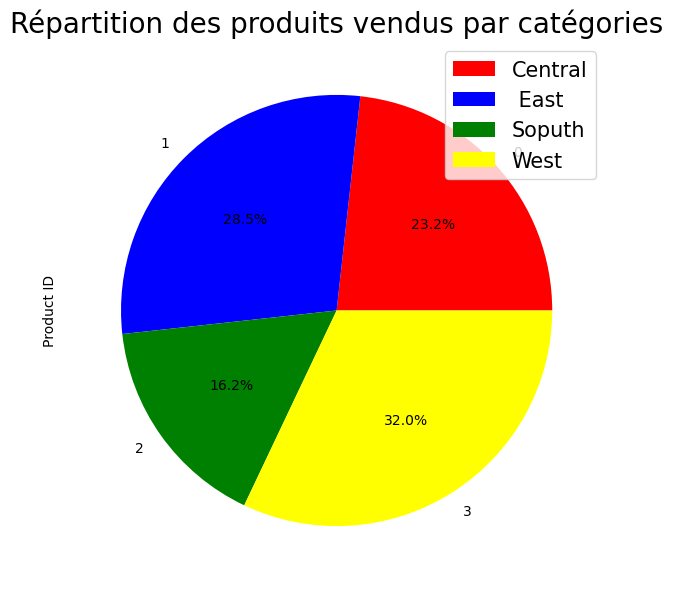

In [38]:
colors=["red","blue","green","yellow"]
Quan_prod_region.plot.pie(y="Product ID", colors = colors, figsize=(7, 7), autopct = "%1.1f%%" )
plt.title("Répartition des produits vendus par catégories", size = 20)
plt.legend(['Central',' East','Soputh','West'], fontsize = 15)
plt.show()

**Top 1**
- La région  **West**  enrégistre le plus de produits vendus avec 32% des ventes de l'entreprise.

**Top 2**
- La région **East** quant à elle enrégistre plus de 28% des produits vendus.

**Top 3**
- La région **Central** enrégistre plus de 23% des produits vendus.

**Top4**
- La région **Sounth** enrégistre la plus faible ventre avec moins de 17% des produits vendus.

**Cela indique que la région West est la plus performante en termes de ventes, tandis que South est la moins performante**

### Analyse des catégories par région

In [39]:
Cat_region=df.groupby(["Region","Category"]).agg(Nbre_produit=("Product ID","count")).reset_index()
Cat_region

,Region,Category,Nbre_produit
0,Central,Furniture,481
1,Central,Office Supplies,1422
2,Central,Technology,420
3,East,Furniture,601
4,East,Office Supplies,1712
5,East,Technology,535
6,South,Furniture,332
7,South,Office Supplies,995
8,South,Technology,293
9,West,Furniture,707


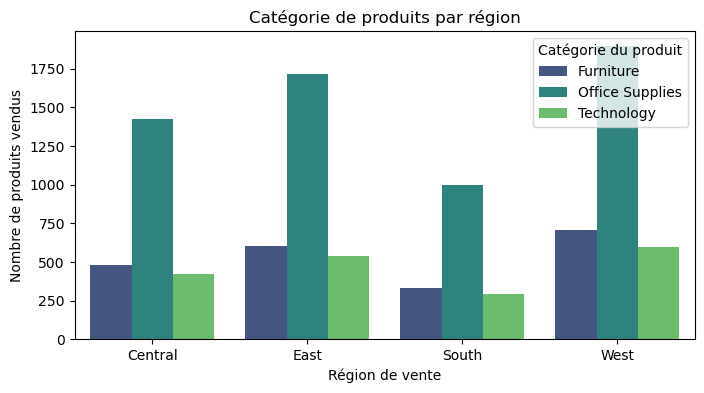

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(data=Cat_region, x='Region', y='Nbre_produit', hue='Category', palette='viridis')
plt.title('Catégorie de produits par région')
plt.xlabel('Région de vente')
plt.ylabel('Nombre de produits vendus')
plt.legend(title='Catégorie du produit')
plt.show()

- La catégorie **Office Supplies** est de loin la catégorie de produit la plus vendus dans toutes les régions en terme de quantité de produits vendus.
- Et vient en deuxième place la catégorie **Furniture** qui dépasse légèrement la catégorie **Technology** dans toutes les régions.

## <center> Analyse du chiffre d'affaire par région

### Chiffre d'affaire total par région

In [41]:
CA_region=df.groupby(["Region"]).agg(CA=("Sales","sum")).reset_index()
CA_region

,Region,CA
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


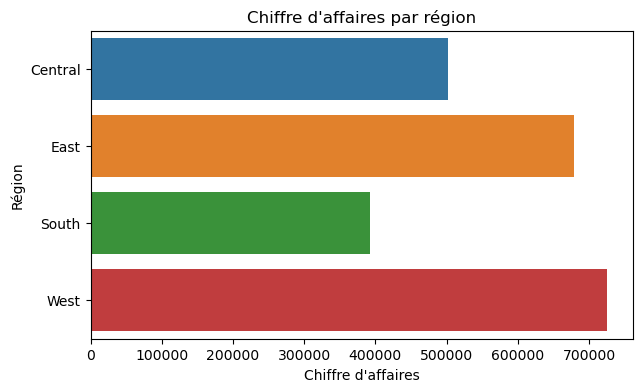

In [42]:
# Chiffre d'affaires par région
plt.figure(figsize=(7, 4))
sns.barplot(x='CA', y='Region', data=CA_region)
plt.title('Chiffre d\'affaires par région')
plt.xlabel('Chiffre d\'affaires')
plt.ylabel('Région')
plt.show()


- La région **West** génère le plus de chiffre d'affaires, soit plus de 725 000€
- La région **East** occupe la deuxième position avec environ 679 000€ de chiffre d'affaire. 
- En troisième position nous avons la région **Central** avec plus de 501 000€ de chiffre d'affaire.
- La région **South** est la moins performante en termes de ventes avec un chiffre d'affaire d'environ  391 000€.

**Cela confirme que la région West est la plus performante en termes de chiffre d'affaire, tandis que South est la moins performante**

### Chiffre d'affaire total par région et catégorie de produit

In [43]:
CA_cat_region=df.groupby(["Region","Category"]).agg(CA_total=("Sales","sum")).reset_index()
CA_cat_region

,Region,Category,CA_total
0,Central,Furniture,163797.1638
1,Central,Office Supplies,167026.4150
2,Central,Technology,170416.3120
3,East,Furniture,208291.2040
4,East,Office Supplies,205516.0550
5,East,Technology,264973.9810
6,South,Furniture,117298.6840
7,South,Office Supplies,125651.3130
8,South,Technology,148771.9080
9,West,Furniture,252612.7435


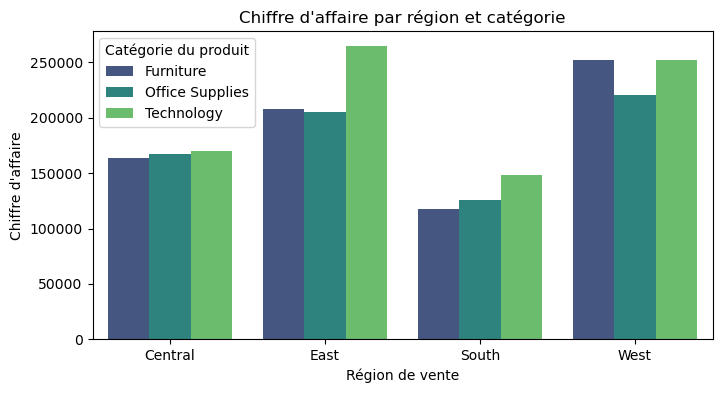

In [44]:
plt.figure(figsize=(8, 4))
sns.barplot(data=CA_cat_region, x='Region', y='CA_total', hue='Category', palette='viridis')
plt.title("Chiffre d'affaire par région et catégorie")
plt.xlabel('Région de vente')
plt.ylabel("Chiffre d'affaire")
plt.legend(title='Catégorie du produit')
plt.show()

**Central**

- Dans cette région les chiffres d'affaire diffèrent légèrement par catégories.
- La catégorie **Technology** occupe la 1ère place suivie de la catégorie **Office Supplies** et en dernière position la catégorie **Furniture**.

**East**

- La catégorie **Techology** enrégistre le plus gros chiffre d'affaire.
- Les chiffres d'affaire générés par les catégories **Furniture** et **Office Supplies** diffèrent légèrement avec une domination de la catégorie **Furniture**.

**South**

Dans cette région le classement par chiffre d'affaire est comme suit:
- 1ère position la catégorie **Technology**.
- 2ème position la catégorie **Office Supplies**.
- 3ème position la catégorie **Furniture**.

**West**

- La catégorie **Technology** et la catégorie **Furniture** occupent la prémière place.
- La catégorie **Office Supplies** occupe la dernière place.


## <center>Analyse des performances comparées par région.

In [45]:
# Calcul des indicateurs par région
performance_par_region =round(df.groupby('Region').agg({'Product Cost':'sum',
    'Sales': 'sum',          
    'Profit': 'sum',         
    'Quantity': 'sum',       
    'Marge %': 'mean'          
}).reset_index())
performance_par_region['Part de marché (%)'] = round((performance_par_region['Sales'] / CA) * 100)
print(performance_par_region)

    Region  Product Cost     Sales    Profit  Quantity  Marge %  \
0  Central      461534.0  501240.0   39706.0      8780    -10.0   
1     East      587258.0  678781.0   91523.0     10618     17.0   
2    South      344972.0  391722.0   46749.0      6209     16.0   
3     West      617039.0  725458.0  108418.0     12266     22.0   

   Part de marché (%)  
0                22.0  
1                30.0  
2                17.0  
3                32.0  


**Analyse des coûts totaux par région**

- **West** a le coût total le plus élevé avec 617 039, suivi de **East** avec 587 258, **Central** avec 461 534, et enfin **South** avec 344 972.
-Cela montre que **West** et **East** sont les régions où les coûts opérationnels sont les plus importants, tandis que **South** est la région la moins coûteuse.

**Profit**

- **West** génère le profit le plus élevé avec 108 418, suivi de **East** avec 91 523, **South** avec 46 749, et **Central** avec 39 706.
- La région **Central** a le profit le plus faible, ce qui pourrait indiquer des coûts plus élevés ou des marges plus faibles dans cette région.

**Marge %**
- **West** a la marge nette la plus élevée avec 22%, suivie de **East** avec 17%, **South** avec 16%, et **Central** avec -10%.
- La marge nette négative de **Central** (-10%) est préoccupante et suggère que cette région fonctionne à perte. Cela pourrait être dû à des coûts opérationnels élevés, des prix de vente bas, ou une combinaison des deux.

**Part de marché (%)**
- **West** domine également en termes de part de marché avec 32%, suivi de **East** avec 30%, **Central** avec 22%, et **South** avec 17%.
- Cela montre que **West** et **East** sont les régions les plus dominantes sur le marché, tandis que **South** et **Central** ont une part de marché plus faible